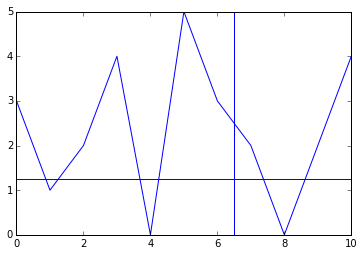

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from IPython.display import clear_output, display, HTML

class InteractiveCursor(object):
    initialized = False
    fig = None
    ax = None
    vline = None
    hline = None

    def initialize(self):
        self.fig, self.ax = plt.subplots()
        self.ax.plot([3,1,2,4,0,5,3,2,0,2,4])
        self.vline = self.ax.axvline(1)
        self.hline = self.ax.axhline(0.5)

    def set_cursor(self, x, y):
        if not self.initialized:
            self.initialize()

        self.vline.set_xdata((x, x))
        self.hline.set_ydata((y, y))

        if self.initialized:
            display(self.fig)
        self.initialized = True

ic = InteractiveCursor()
def set_cursor(x, y):
    ic.set_cursor(x, y)

interact(set_cursor, x=(1, 9, 0.01), y=(0, 5, 0.01));

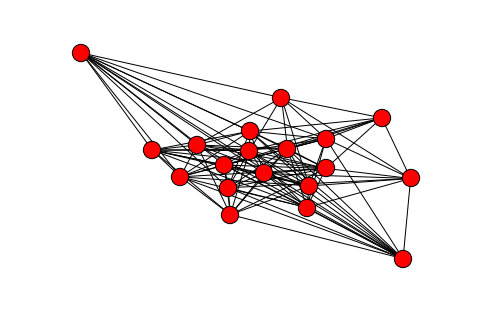

In [7]:
import networkx as nx

# wrap a few graph generation functions so they have the same signature

def random_lobster(n, m, k, p):
    return nx.random_lobster(n, p, p / m)

def powerlaw_cluster(n, m, k, p):
    return nx.powerlaw_cluster_graph(n, m, p)

def erdos_renyi(n, m, k, p):
    return nx.erdos_renyi_graph(n, p)

def newman_watts_strogatz(n, m, k, p):
    return nx.newman_watts_strogatz_graph(n, k, p)

def plot_random_graph(n, m, k, p, generator):
    g = generator(n, m, k, p)
    nx.draw(g)
    plt.show()

interact(plot_random_graph, n=(2,30), m=(1,10), k=(1,10), p=(0.0, 1.0, 0.001),
        generator={'lobster': random_lobster,
                   'power law': powerlaw_cluster,
                   'Newman-Watts-Strogatz': newman_watts_strogatz,
                   u'Erdős-Rényi': erdos_renyi,
                   });


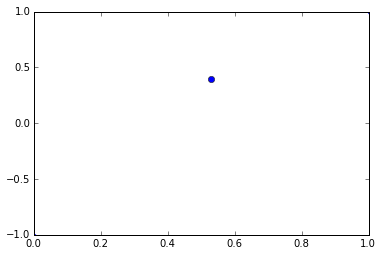

In [10]:
from IPython.html.widgets import *
x = FloatSlider(value = 500.0, min=0.0, max=1000.0, step=10)
y = FloatSlider(value = 0.0, min=-1.0, max=1.0, step=0.1)
plt.xlim(0,1)
plt.ylim(-1,1)

def Function(x, y):
    plt.plot([0.0, 1.0], [-1.0, 1.0], 'b.')
    plt.plot(x/1000.0, y, 'o')

#this gives me the desired arrangment
f = interactive(Function, x=x, y=y)
Co = HBox(f.children)

display(Co)

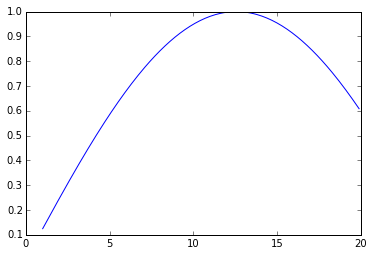

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.html.widgets import *
n = FloatSlider(value = 10, min=0, max=20, step=1)

def plot_sine(n):
    x = np.arange(1, 20, 0.1);
    y = np.sin(x/n)
    plt.plot(x, y)
    

#this gives me the desired arrangment
f = interactive(plot_sine, n=n)
box = HBox(f.children)

display(box)